*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall23/notebooks/module00_03_numpy.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# NumPy:  Efficient Computation for Multi-Dimensional Arrays.

In addition to covering the basics of NumPy this notebook introduces some key concepts for slicing and dicing array data. Also, we start to take randomness seriously with examples of how to sample from a random variable with the example of simulating a [Random Walk](https://en.wikipedia.org/wiki/Random_Walk).


## What is NumPy?


[NumPy](https://numpy.org/) (Numerical Python) is Python's library for numerical data, and provides a wealth of functionality for working with array data.

NumPy features include:
  * A fast and efficient multidimensional array object called the *ndarray*
  * Functions for performing computations on arrays
  * Tools for reading and writing array-based datasets to disk
  * Linear algebra operations and random number generation

This tutorial is a brief introduction.  For more information please refer to one of the following resources:

* The NumPy [documentation](https://numpy.org/doc/stable/), which includes multiple tutorials.
* The [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake Vander Plas.

NumPy is going to be our primary Python programming tool for this course, and is one of the primary programming tools used in machine learning.

As described in a recent [Nature publication](https://www.nature.com/articles/s41586-020-2649-2) by the authors and primary contributors to the package, NumPy has a special role in the Python data science and scientific computing eco-system:

> NumPy underpins almost every Python library that does scientific or numerical computation including SciPy, Matplotlib, pandas, scikit-learn, and scikit-image. ... Because of its inherent simplicity, the NumPy array is the de facto exchange format for array data in Python.

The following figure from this paper captures this:

<img style="float: center;" src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png" width="400">

Furthermore, once you have learned to use NumPy, you will find it easier to learn other packages like TensorFlow and PyTorch.


Our first step is to **import** the package (note the "import as" shortcut):

In [1]:
import numpy as np

**Python note:**  Instead of the above import, we could have done ``from numpy import *``, which would have made every statement shorter by not having to write ``np.`` before each NumPy command.  That is not a good idea, as the NumPy namespace conflicts with built in Python functions like ``min`` or ``max``.

To check which version of NumPy you have installed:

In [2]:
np.__version__

'1.23.4'

Arrays are the standard data containers in NumPy, and can have any number of dimensions.

Let's start with a one dimensional array:

In [3]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

And its pure Python counterpart:

In [4]:
my_list = [1, 2, 3]

Unlike NumPy arrays, Python lists can handle heterogeneous data types:

In [5]:
my_heterogeneous_list = [1, 2.0, True, 'Python', [1,2,3]]

# let's show the types of each element in the list:
[type(item) for item in my_heterogeneous_list]

[int, float, bool, str, list]

What have we gained over using a Python list?  In fact, NumPy arrays are less flexible than Python lists:

In [6]:
my_list[0] = 'a'

try :
    my_array[0] = 'a'
except :
    print("wrong type in assignment")

wrong type in assignment


As we just saw, Python lists are very flexible - they can store any type of data.  But that comes at a cost, both in speed and memory.
To understand this cost we need to understand the implementation of Python lists a little better.  Python is written in C, and under the hood, every Python object is essentialy pointer to a C structure.
Memory-wise, the Python list, is thus a pointer to a block of pointers, each of which in turn points to a Python object (even an integer is an object in Python).

![Array Memory Layout](https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/array_vs_list.png)

The reduced flexibility of NumPy arrays comes with improved efficiency both in terms of storage, execution, and a wealth of functionality for fast manipulation of numeric data.

Furthermore, using NumPy's C API, libraries written in C or Fortran, can operate on the data stored in a NumPy array without needing to copy the data. 

Let's demonstrate the speed advantage of NumPy arrays:

In [7]:
my_array = np.arange(1000000)
my_list = list(range(1000000))
# Note: simply calling range(10000000) does not create a list!

In [8]:
my_array[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
%timeit my_array2 = my_array * 2

3.06 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit my_list2 = [x * 2 for x in my_list]

89.1 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


This is our first example that demonstrates the speed advantage of using NumPy ndarrays over Python lists.

### Vectorized code

NumPy provides a high-level API for array programming.  If you can express your analysis as operations on vectors and matrices like we just did above, the resulting NumPy code will be fast, comparable in speed to code written in a compiled language.
To produce efficient NumPy code will require a different mindset:  we will need to think in terms of vectors and matrices.  This is often called **vectorization**, and refers to the process of expressing a computation in terms of vectors and matrices.
One of our goals in this course is to get you accustomed to expressing computations in this way.

**Why is vectorized code faster?**  By expressing our code in this way we are able to avoid for loops in our Python code.  Instead, the code performs the loop in the underlying C code layer, which is much faster.

**A note about timing Python code.**  There are multiple ways of timing Python code snippets in the Jupyter notebook;
``%time`` is another magic command that can be used for this task.  ``%timeit`` is usally preferred (see [this article](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for more information about profiling Python code).

### Example of vectorized operations on NumPy ndarrays

NumPy ndarrays enable you to perform mathematical operations on entire arrays in a single operation without requiring for loops.  As mentioned above, this is called *vectorization*, and is key for writing efficient machine learning code.

We will now see some examples.

### Array multiplication and addition

In [11]:
data = np.array( [ [1,2,3], [4,5,6] ])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
print(data * 10)    # multiply array by a scalar
print()
print(data + data)  # add arrays

[[10 20 30]
 [40 50 60]]

[[ 2  4  6]
 [ 8 10 12]]


### Boolean Operations on Arrays

You can also perform vectorized Boolean operations on arrays:

In [13]:
a1 = np.array([[1., 2., 3.], [4., 5., 6.]])
a2 = np.array([[0., 4., 1.], [7., 2., 12.]])
a2 > a1

array([[False,  True, False],
       [ True, False,  True]])

### Array shape and dtype

Every ndarray has a **shape**, which is a tuple indicating the size of each dimension, and a **dtype**, an object describing the data type of the array:


In [14]:
data.shape,data.dtype

((2, 3), dtype('int64'))

The `dtype` attribute tells us what kind of array got created.

Note that NumPy inferred the type from the data that we provided.  To demonstrate that, let's check what happens if there are floating point numbers in the input to the ndarray constructor:  

In [15]:
arr1 = np.array([6, 7.5, 8, 0, 1])
print(arr1,arr1.dtype)
arr2 = np.array([6, 7, 8, 0, 1])
print(arr2,arr2.dtype)

[6.  7.5 8.  0.  1. ] float64
[6 7 8 0 1] int64


Let's compare *shape* with the Python *len* function.  On 1d arrays the result is almost the same:

In [16]:
print(arr1.shape)
print(len(arr1))

(5,)
5


Now let's look at a 2d array:


In [17]:
print(data)
print("Its shape:")
print(data.shape)
print("Its length:")
print(len(data))

[[1 2 3]
 [4 5 6]]
Its shape:
(2, 3)
Its length:
2


### Data types

As described above, the dtype associated with an ndarray is the type used to store the elements of the array.
The numerical dtypes are named as follows: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 64 bits. Thus, this type is known in NumPy as ``float64``.

In [18]:
a1 = np.array([1, 2, 3], dtype=np.float64)
a2 = np.array([1, 2, 3], dtype=np.int32)
a1.dtype,a2.dtype

(dtype('float64'), dtype('int32'))

What would be the resulting data type for an array that contains strings and numbers?

In [19]:
# create an array that contains strings and 
# numbers and check its data type

What is the data type of the first element of the array?

### Creating arrays

NumPy has plenty of ways for creating all kinds of arrays - initialized with zeros, ones, or random values.  Typically they have a size argument that determines the shape of the array.

Here are some examples, and we'll start by creating an array of zeros:

In [20]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

An array of ones:

In [21]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

### Arrays of random numbers

Random numbers are very useful in machine learning!

We can create random integers:

In [22]:
seed = 42
from numpy.random import default_rng
rng = default_rng(seed)  
# this creates an instance of a random number generator 
# the argument is called the "seed"

# create integers between 1 and 6:
rng.integers(1,7, size=(10,))

array([1, 5, 4, 3, 3, 6, 1, 5, 2, 1])

Let's check what happens if we run this code again:

In [23]:
rng = default_rng(seed)
rng.integers(1,7, size=(10,))

array([1, 5, 4, 3, 3, 6, 1, 5, 2, 1])

This reveals just how "random" are the random numbers produced by NumPy!

### Not all that is random is integer

Let's create random floating point numbers between 0 and 1:

In [24]:
rng.random(size=(3,3))  # you can also call it as rng.random((3,3))

array([[0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802],
       [0.92676499, 0.64386512, 0.82276161]])

NumPy can also generate random numbers with other distributions, e.g. the normal (aka Gaussian) distribution:

In [25]:
rng.standard_normal(size=(5,))

array([ 0.46750934, -0.85929246,  0.36875078, -0.9588826 ,  0.8784503 ])

The following plot should convince us that `np.standard_normal` is working as advertised:

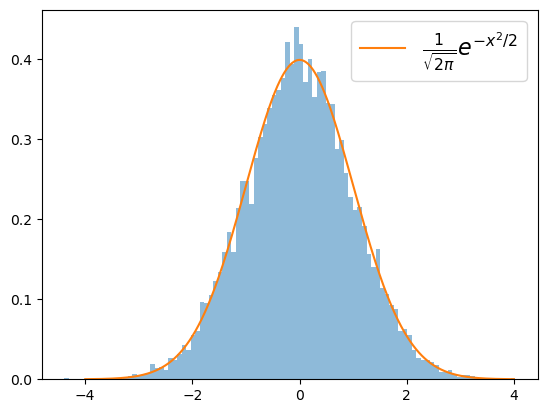

In [26]:
import matplotlib.pyplot as plt

sample = rng.standard_normal(size=(10000,))
plt.hist(sample, 100, density=True, alpha=0.5);

x = np.linspace(-4, 4, 1000)

normal = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x,normal, label=r'$\frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$');
plt.legend(fontsize='16');

### A note about randomness

There is something truly fundamental about the usefulness of random variables. Randomness has pratical value and we will see many examples of that during this course.  An example we will see later this semester is [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), an example of an algorithm made better by randomness.

### Ranges

`arange` is the NumPy equivalent of the `range` function.  It is more flxible than its pure Python counterpart and provides fractional strides:

In [27]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

The `linspace` function provides similar functionality with a slightly different interface:

In [28]:
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

### Reminder - getting **help** on python objects:

For getting help e.g. on the Numpy **linspace** function you can do one of the following:

```python
?np.linspace
```

or

```python
help(np.linspace)
```

In [29]:
#help(np.linspace)

### Array indexing and slicing

Indexing in NumPy behaves like you would expect in Python:

In [30]:
a = np.array([2,3,4])
print("array elements:  ", a[0], a[1], a[2])
a[0] = 5                  # Change an element of the array
a

array elements:   2 3 4


array([5, 3, 4])

Similarly to Python lists, you can use negative numbers to index NumPy arrays.  For example `a[-1]` is the last element in an array:

In [31]:
a[-1]

4

### Class question

Can you explain what's happening in the following piece of code?  (Hint:  refer to the picture shown above of a NumPy array.)

In [32]:
a = np.array([2,3,4])
b = a
b[0] = 1234
print("a: ", a)
print("b: ", b)

a:  [1234    3    4]
b:  [1234    3    4]


### Slices in NumPy

The syntax for slices in NumPy is the same as slices of Python lists:

In [33]:
a = np.arange(10)
print(a)
a[5:8]

[0 1 2 3 4 5 6 7 8 9]


array([5, 6, 7])

You can assign values to a slice:

In [34]:
a[5:8] = 12
a

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Do slices create copies of the underlying data?  Let's see:

In [35]:
a_slice = a[5:8]
a_slice

array([12, 12, 12])

In [36]:
a_slice[1] = 12345
a

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

NumPy has been designed to be able to work with very large arrays, so eagerly copying data could cause severe performance and memory problems.

If you want a copy of a slice instead of a view, you will need to explicitly copy it using e.g. ``arr[5:8].copy()``.


### Two dimensional arrays

Let's look at two dimensional arrays or *matrices*.

In [37]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# two ways of indexing a two dimensional array:
print(a[0, 0], a[0, 1])
print(a[0][0], a[0][1])

a.shape

1 2
1 2


(3, 4)

The latter form of indexing works, because each row of a two dimensional array is an array as well.

So, to access the first row:

In [38]:
row = a[0]    # the first row of a
row, row.shape

(array([1, 2, 3, 4]), (4,))

To access a column:

In [39]:
print(a)
col = a[:, 0]
col, col.shape

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


(array([1, 5, 9]), (3,))

We can perform slicing on multiple dimensions, creating a submatrix:

In [40]:
print(f'a:\n{a}')
submatrix = a[1:3, 1:4]
print(f'submatrix:\n{submatrix}')
submatrix.shape

a:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
submatrix:
[[ 6  7  8]
 [10 11 12]]


(2, 3)

### Fancy indexing

You can index an array using an integer array:


In [41]:
print(f'a: \n{a}')
a[ [0, 2] ]   # extract a given set of rows

a: 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [42]:
a[:, [0,2]]  # extract a given set of columns

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

### Class question

**Question:** does indexing using an array create a copy of the array or simply a view, as in the case of slicing?

In [43]:
## write some code to answer this question

### Exercises

Describe the effect of each of the following slices:

In [44]:
a2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
a2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
a2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [47]:
a2d[-1, :2]

array([7, 8])

In [48]:
a2d[:, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Boolean indexing

You are about to see another very powerful aspect of arrays in NumPy:
 selectively accessing parts of an array based on a Boolean condition.
This is called **Boolean indexing**.

In [49]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = rng.standard_normal(size=(7, 4))
print(f'Names are:\n{names}')
print(f'Data is:\n{data}')

Names are:
['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
Data is:
[[-0.19794763 -0.24423663  0.41795911 -0.00869837]
 [-0.54588358  1.24856578 -0.53925748 -0.29209636]
 [-1.59149764 -0.71362588  0.51607608  0.32060196]
 [ 0.59951699  0.55098229  2.08771404 -0.74785883]
 [-1.61942374 -1.050553   -0.70365184 -0.97432694]
 [ 0.09366085  1.25265491  1.53965907  0.5043085 ]
 [ 2.14127222 -0.35637306 -1.63251904  1.05317807]]


In [50]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [51]:
data[names == 'Bob']

array([[-0.19794763, -0.24423663,  0.41795911, -0.00869837],
       [ 0.59951699,  0.55098229,  2.08771404, -0.74785883]])

In [52]:
cond = names == 'Bob'
print(~cond)
data[~cond]

[False  True  True False  True  True  True]


array([[-0.54588358,  1.24856578, -0.53925748, -0.29209636],
       [-1.59149764, -0.71362588,  0.51607608,  0.32060196],
       [-1.61942374, -1.050553  , -0.70365184, -0.97432694],
       [ 0.09366085,  1.25265491,  1.53965907,  0.5043085 ],
       [ 2.14127222, -0.35637306, -1.63251904,  1.05317807]])

In [53]:
cond = (names == 'Bob') | (names == 'Will')
print(cond)
data[cond]

[ True False  True  True  True False False]


array([[-0.19794763, -0.24423663,  0.41795911, -0.00869837],
       [-1.59149764, -0.71362588,  0.51607608,  0.32060196],
       [ 0.59951699,  0.55098229,  2.08771404, -0.74785883],
       [-1.61942374, -1.050553  , -0.70365184, -0.97432694]])

**Note:** The Python keywords ``and`` and ``or`` do not work with boolean arrays. You need to use the operators & and | instead of `and` / `or`, as you have just seen above.

We can use conditions to modify an array:

In [54]:
print(data < 0)
data[data < 0] = 0
data

[[ True  True False  True]
 [ True False  True  True]
 [ True  True False False]
 [False False False  True]
 [ True  True  True  True]
 [False False False False]
 [False  True  True False]]


array([[0.        , 0.        , 0.41795911, 0.        ],
       [0.        , 1.24856578, 0.        , 0.        ],
       [0.        , 0.        , 0.51607608, 0.32060196],
       [0.59951699, 0.55098229, 2.08771404, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.09366085, 1.25265491, 1.53965907, 0.5043085 ],
       [2.14127222, 0.        , 0.        , 1.05317807]])

In [55]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.24856578, 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.09366085, 1.25265491, 1.53965907, 0.5043085 ],
       [2.14127222, 0.        , 0.        , 1.05317807]])

### Reshaping arrays

You can modify the shape of an array as long as you maintain the number of elements:

In [56]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [57]:
a = np.arange(15).reshape((3, 5))
(a,a.shape)

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]),
 (3, 5))

Here's where it becomes interesting - instead of performing reshape as we have done above:

In [58]:
np.arange(15).reshape((3, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

we can do the following:

In [59]:
np.arange(15).reshape((-1, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

This is a neat trick:  -1 here means "as many rows as needed".

#### The transpose of a matrix

Let's look at the *transpose* of a matrix:

In [60]:
np.transpose(a), np.transpose(a).shape

(array([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]]),
 (5, 3))

### Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in an ndarray. 


In [61]:
a = np.arange(5)
np.set_printoptions(precision=3)
print(f'array:\t\t{a}')
print(f'Square root:\t{np.sqrt(a)}')
print(f'Exponentiate:\t{np.exp(a)}')
print(f'Square:\t\t{np.square(a)}')

array:		[0 1 2 3 4]
Square root:	[0.    1.    1.414 1.732 2.   ]
Exponentiate:	[ 1.     2.718  7.389 20.086 54.598]
Square:		[ 0  1  4  9 16]


In the above code we controlled the number of digits displayed.  That does not affect the precision of computations!  Also notice the use of the tab character and resulting alignment of the printed output.

A complete list of ufuncs is available in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

### Stacking arrays

You can extend arrays by stacking them horizontally or vertically:

In [62]:
x = np.array( [[1,2],[3,4]] )
y = np.array( [[5,6],[7,8]] )
np.vstack([x,y]),np.hstack([x,y])

(array([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]),
 array([[1, 2, 5, 6],
        [3, 4, 7, 8]]))

In machine learning vertical and horizontal stacking of arrays is used to add features or training examples to a feature matrix $X$.  There are other forms of stacking arrays, and we refer your to the NumPy documentation for [additional stacking functions](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays).

### Array Broadcasting

Consider the following piece of code:

In [63]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    x[i] = x[i] + v
x

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

There is a much more efficient way of doing this that does not use a loop:

In [64]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
x + v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This is called **broadcasting**.
The following image explains what NumPy is doing in this case:

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://numpy.org/doc/stable/_images/broadcasting_2.png" width="500">

Broadcasting is described in greater detail in the [NumPy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html) and [data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).


### Mathematical  and statistical operations on arrays

NumPy provides functionality for a variety of mathematical operations on arrays:

* `np.sum` - sum
* `np.mean` - arithmetic mean
* `np.average` - average (can compute weighted averages)
* `np.std` - standard deviation
* `np.median` - median
* `np.max`, `np.min` - maximum/minimum
* `np.argmax`, `np.argmin` - index of maximum/minimum

And many [more](https://numpy.org/doc/stable/reference/routines.statistics.html).

Applying these methods to a two dimensional array performs the operation over the entire array.  Let's look at `np.sum` for example:

In [65]:
a = rng.standard_normal(size=(4, 3))
print(a)
a.sum() # same as np.sum(a) 

[[-1.839 -0.755  0.52 ]
 [-0.102 -0.191 -1.181]
 [-0.011  1.004  0.02 ]
 [-0.83  -1.248 -0.81 ]]


-5.422140365119859

Sums can be performed along a given axis:

In [66]:
print(a)
a.sum(axis=0)

[[-1.839 -0.755  0.52 ]
 [-0.102 -0.191 -1.181]
 [-0.011  1.004  0.02 ]
 [-0.83  -1.248 -0.81 ]]


array([-2.782, -1.19 , -1.45 ])

This can seem a bit confusing, but think about the axis keyword as determining the axis that collapses as a result of performing the operation.  It's NOT the axis over which the operation is performed!

In [67]:
a.sum(axis=1)

array([-2.073, -1.474,  1.013, -2.887])

Let's demonstrate just how much faster the NumPy `sum` function is than its pure Python counterpart:

In [68]:
big_array = rng.random(size=(1000000,))
big_list = list(big_array)
%timeit sum(big_list)
%timeit np.sum(big_array)

52.2 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
766 µs ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### NumPy as a tool for expressing mathematical formulas

One of the great advantages of using NumPy is that many of the mathematical formulas that are common in machine learning can be succinctly expressed.  Consider for example the computation of the mean-squared error which is used to quantify the quality of a regression model:

$$
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2.
$$

Here $y_1,\ldots,y_N$ are the given labels and $\hat{y}_1,\ldots,\hat{y}_N$ are the predicted labels.
The MSE quantifies the discrepancy between the predicted labels and the labels provided by the user.

This formula is easy to express using a single line of code:

In [69]:
y = np.array([1, 1.5, 2])
y_pred = np.array([0.8, 1.6, 2.4])

(1/len(y)) * np.sum( (y_pred - y)**2 )

# alternative:  (1/len(y)) * np.sum( np.square(y - y_pred))
# or:
# np.mean((y_pred - y)**2)

0.06999999999999997

### Exercise

* Compute the accuracy of a machine learning classifier.  In this case the labels are discrete, and the error is expressed as:
$$
\mathrm{accuracy} = \frac{1}{N}\sum_{i=1}^N \left[\hat{y}_i = y_i\right].
$$
Here the notation $[\mathrm{condition}]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket), which is equal to 1 if the condition is true, and 0 otherwise.
Also note that the equality sign in this formula corresponds to the programming `==` operator.

In [70]:
y = np.array([0, 1, 1, 1, 0])
y_pred = np.array([1, 0, 1, 1, 0])
# as a hint consider the Boolean condition y==y_pred
# accuracy = ...

For your reference here is a pure Python implementation:

In [71]:
accuracy = sum([ y[i]==y_pred[i] for i in range(len(y)) ]) / len(y)
accuracy

0.6

### Example:  Random Walks

A random walk in one dimension is a random process where at each step the walker takes a step either to the left or to the right.  Random walks have interesting statistical properties that can be investigated by simulating them.

In [72]:
import random
def random_walk(n):
    """Return a list of positions in a random walk"""
    position = 0
    walk = [position]
    for i in range(n):
        position += 2*random.randint(0, 1) - 1
        walk.append(position)
    return walk

walk_length = 1000
walk = random_walk(walk_length)
print(walk[:20])

[0, 1, 2, 1, 2, 1, 2, 3, 4, 5, 6, 5, 4, 5, 4, 3, 4, 3, 4, 5]


In [73]:
%timeit random_walk(walk_length)

1.19 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Here's a much more efficient NumPy version:

In [74]:
def random_walk_vectorized(n, seed=42):
    rng = default_rng(seed)
    steps = rng.choice([-1,+1], n)
    return np.cumsum(steps)

In [75]:
random_walk_vectorized(10)

array([-1,  0,  1,  0, -1,  0, -1,  0, -1, -2])

In [76]:
%timeit random_walk_vectorized(walk_length)

106 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


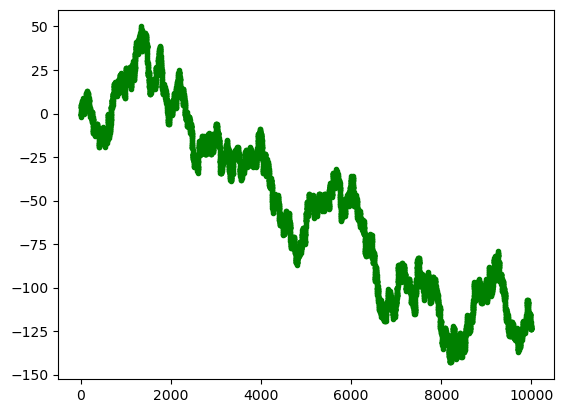

In [77]:
num_steps = 10000
distance = random_walk_vectorized(num_steps)
t = np.arange(num_steps)
plt.plot(t, distance, 'g.');